#  Context

The dataset contains economic indicators for different years, particularly focusing on GDP growth and various sectoral growth rates for Ghana.

- Source:Ghana Statistiscal severvice(GSS Statsbank).


#  Objective

To perform Cluster Analysis of Economic Indicators in Ghana


#  Data Description

- Year: The year for which the economic indicators are reported.
- GDP Growth (Annual): The annual percentage change in Gross Domestic Product (GDP), which is a key indicator of economic health.
- Agriculture Growth: The annual percentage change in the agricultural sector's contribution to GDP.
- Crops Growth: The annual percentage change in the crops sector's contribution to GDP.
- Cocoa Growth: The annual percentage change in the cocoa sector's contribution to GDP.
- Livestock Growth: The annual percentage change in the livestock sector's contribution to GDP.
- Forestry Growth: The annual percentage change in the forestry sector's contribution to GDP.
- Fishing Growth: The annual percentage change in the fishing sector's contribution to GDP.
- Industry Growth: The annual percentage change in the industrial sector's contribution to GDP.
- Mining Growth: The annual percentage change in the mining sector's contribution to GDP.
- Oil Growth: The annual percentage change in the oil sector's contribution to GDP.
- Manufacturing Sector Growth: The annual percentage change in the manufacturing sector's contribution to GDP.
- Electricity Growth: The annual percentage change in the electricity sector's contribution to GDP.
- Water and Sewage Growth: The annual percentage change in the water and sewage sector's contribution to GDP.
- Construction Growth: The annual percentage change in the construction sector's contribution to GDP.
- Service Growth: The annual percentage change in the services sector's contribution to GDP.
- Trade Growth: The annual percentage change in the trade sector's contribution to GDP.
- Accommodation and Food Services Growth: The annual percentage change in the accommodation and food services sector's contribution to GDP.
- Transport and Storage Growth: The annual percentage change in the transport and storage sector's contribution to GDP.
- ICT Growth: The annual percentage change in the Information and Communication Technology (ICT) sector's contribution to GDP.
- Finance and Insurance Growth: The annual percentage change in the finance and insurance sector's contribution to GDP.
- Real Estate Growth: The annual percentage change in the real estate sector's contribution to GDP.
- Professional, Administrative, and Support Growth: The annual percentage change in the professional, administrative, and support services sector's contribution to GDP.
- Public Administration, Defence, and Social Security Growth: The annual percentage change in the public administration, defense, and social security sector's contribution to GDP.
- Education Growth: The annual percentage change in the education sector's contribution to GDP.
- Health and Social Work Growth: The annual percentage change in the health and social work sector's contribution to GDP.
- Other Service Activities Growth: The annual percentage change in other service activities' contribution to GDP.
- Informal Sector Growth: The annual percentage change in the informal sector's contribution to GDP.


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform Agglomerative clustering and generate a dendogram 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# data Importation 
data = pd.read_csv("Ghana GDP Data.csv")

# Understanding the data

In [3]:
data.head()

,Year,GDP GROWTH,AGRIC GROWTH,CROPS GROWTH,COCOA GROWTH,LIVESTOCK GROWTH,FORESTRY GROWTH,FISHING GROWTH,INDUSTRY GROWTH,MINING GROWTH,...,AccomodationFoodServices_GROWTH,TransportStorage_GROWTH,ICT_GROWTH,Finance_Insurace_GROWTH,RealEstate_GROWTH,"Professional, Administrative_Support_GROWTH",Public_Administration_Defence_Social_Security_GROWTH,Education_GROWTH,Health_Social_Work_GROWTH,Other_Service_Activities_GROWTH
0,2007,4.1,-1.5,-1.4,-8.2,4.7,-4.1,-7.3,4.4,6.9,...,2.5,9.2,4.1,18.4,3.2,3.2,11.3,10.0,3.8,8.9
1,2008,9.0,7.6,8.6,3.2,5.1,-3.3,17.4,10.7,2.4,...,9.1,3.8,19.5,10.8,0.0,0.0,12.7,13.0,4.4,9.2
2,2009,5.7,7.3,10.2,5.0,4.4,0.7,-5.7,3.8,6.8,...,-3.8,4.4,3.9,9.3,0.2,0.2,11.7,12.4,15.1,7.5
3,2010,7.8,5.2,5.1,26.6,4.7,10.1,1.5,7.2,10.9,...,2.7,8.0,24.5,16.8,13.9,13.9,3.4,5.3,11.3,10.7
4,2011,14.0,1.4,3.7,14.0,5.1,-14.0,-8.7,32.0,78.1,...,3.6,11.0,17.0,1.0,14.0,14.0,7.4,3.8,5.0,13.0


This shows the the details of the data, such that we have 5 rows and 27 columns present in the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  16 non-null     int64  
 1   GDP GROWTH                                            16 non-null     float64
 2   AGRIC GROWTH                                          16 non-null     float64
 3   CROPS GROWTH                                          16 non-null     float64
 4   COCOA GROWTH                                          16 non-null     float64
 5   LIVESTOCK GROWTH                                      16 non-null     float64
 6   FORESTRY  GROWTH                                      16 non-null     float64
 7   FISHING GROWTH                                        16 non-null     float64
 8   INDUSTRY GROWTH                                       16 non-n

The output shows the data types of each column, the number of non-null values, and the memory usage. 
This summary is helpful for understanding the structure and characteristics of your DataFrame.

In [5]:
data.nunique()

Year                                                    16
GDP GROWTH                                              16
AGRIC GROWTH                                            14
CROPS GROWTH                                            13
COCOA GROWTH                                            15
LIVESTOCK GROWTH                                         8
FORESTRY  GROWTH                                        15
FISHING GROWTH                                          15
INDUSTRY GROWTH                                         14
MINING GROWTH                                           15
OIL GROWTH                                              11
MANUFACTURING_SEC_GROWTH                                14
ELECTRICITY GROWTH                                      14
Water_Sewage_GROWTH                                     14
CONSTRUCTION GROWTH                                     15
SERVICE GROWTH                                          14
Trade_GROWTH                                            

This shows the number of unique values for each column in the DataFrame. 
It's useful for understanding the diversity of values in each feature.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16.0,2014.50000,4.760952,2007.0,2010.750,2014.50,2018.250,2022.0
GDP GROWTH,16.0,5.88125,3.293067,0.5,3.325,5.95,7.875,14.0
AGRIC GROWTH,16.0,4.53750,2.904451,-1.5,2.250,5.05,7.300,8.5
CROPS GROWTH,16.0,5.25000,3.380335,-1.4,2.650,5.60,8.600,10.2
COCOA GROWTH,16.0,3.41250,9.267569,-9.5,-0.700,3.45,6.350,26.6
LIVESTOCK GROWTH,16.0,5.20625,0.349225,4.4,5.100,5.30,5.425,5.7
FORESTRY GROWTH,16.0,-0.75000,6.464054,-14.0,-3.950,-0.40,3.650,10.1
FISHING GROWTH,16.0,2.26250,10.878044,-23.3,-5.975,2.40,10.350,17.4
INDUSTRY GROWTH,16.0,6.56250,8.414660,-2.5,1.175,4.40,9.300,32.0
MINING GROWTH,16.0,9.73750,21.670129,-12.2,-2.225,6.25,12.150,78.1


This displays statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numerical column in your DataFrame. The T function transposes the output, so the statistics are displayed as rows, making it easier to read.

This summary is useful for getting a quick overview of the central tendency, dispersion, and shape of the distribution of a dataset.

# Visualizing the data

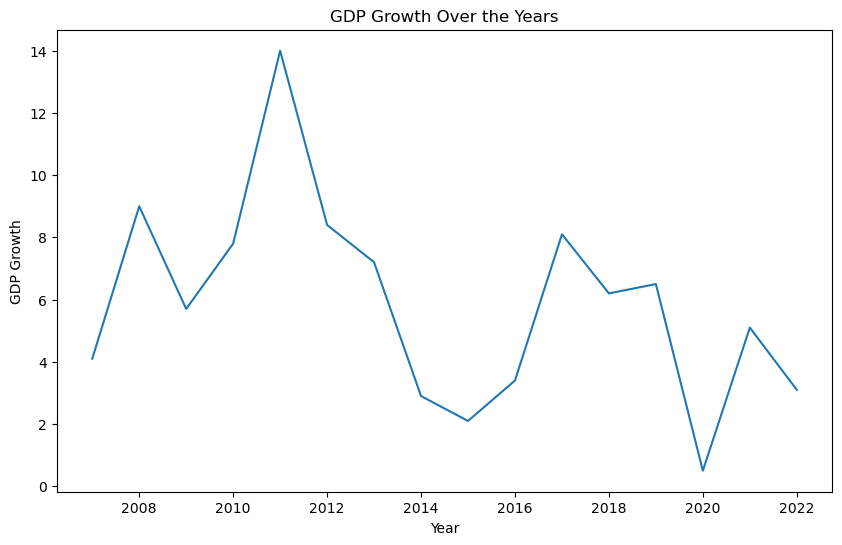

In [7]:
#GDP Growth over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP GROWTH', data=data)
plt.title('GDP Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.show()

The resulting plot shows a line that represents the trend or pattern of GDP growth over the years. By examining the plot, you can visually analyze how GDP growth has changed or fluctuated across different years. 

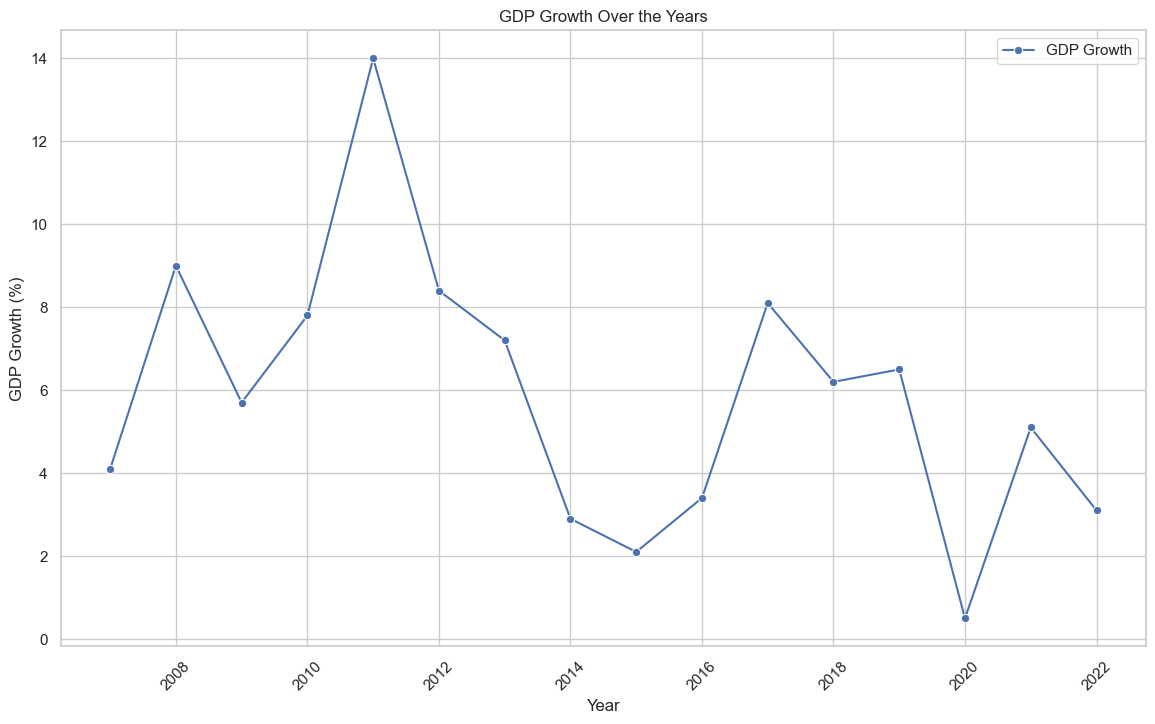

In [8]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Line plot for GDP Growth over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='GDP GROWTH', data=data, marker='o', label='GDP Growth')
plt.title('GDP Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


This is the same as the above visualization but is more aesthetical pleasing because of searbon.

# Outliers Check

In [9]:
from scipy import stats

# Iterate through each column
for column in data.columns:
    # Check if the column contains numerical data
    if np.issubdtype(data[column].dtype, np.number):
        # Calculate z-scores for the current column
        z_scores = stats.zscore(data[column])
        
        # Identify outliers (those with z-scores greater than 3 or less than -3)
        outliers = np.abs(z_scores) > 3

This code is a part of a broader process to identify and handle outliers in the numerical columns of the data DataFrame. After running this code, the outliers array will indicate which values in each numerical column are considered outliers based on z-scores. The threshold of 3 is commonly used, where values with a z-score greater than 3 or less than -3 are considered outliers.

# Converting Columns to Numeric for easy clustering 

In [10]:
# List of columns to convert
columns_to_convert = ["GDP GROWTH", "AGRIC GROWTH", "CROPS GROWTH", "COCOA GROWTH",
                      "LIVESTOCK GROWTH", "FORESTRY  GROWTH", "FISHING GROWTH", "INDUSTRY GROWTH",
                      "MINING GROWTH", "AccomodationFoodServices_GROWTH", "TransportStorage_GROWTH",
                      "ICT_GROWTH", "Finance_Insurace_GROWTH", "RealEstate_GROWTH", "Professional, Administrative_Support_GROWTH",
                      "Public_Administration_Defence_Social_Security_GROWTH", "Education_GROWTH", "Health_Social_Work_GROWTH",
                      "Other_Service_Activities_GROWTH"]

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].mean(), inplace=True)


In [11]:
data['OIL GROWTH'] = pd.to_numeric(data['OIL GROWTH'], errors='coerce')

# Display the updated data types
print(data.dtypes)


Year                                                      int64
GDP GROWTH                                              float64
AGRIC GROWTH                                            float64
CROPS GROWTH                                            float64
COCOA GROWTH                                            float64
LIVESTOCK GROWTH                                        float64
FORESTRY  GROWTH                                        float64
FISHING GROWTH                                          float64
INDUSTRY GROWTH                                         float64
MINING GROWTH                                           float64
OIL GROWTH                                              float64
MANUFACTURING_SEC_GROWTH                                float64
ELECTRICITY GROWTH                                      float64
Water_Sewage_GROWTH                                     float64
CONSTRUCTION GROWTH                                     float64
SERVICE GROWTH                          

This code ensures that the specified columns are numeric and handles missing values by replacing them with the mean of each respective column. This is often done as a preprocessing step before applying clustering algorithms or other numerical analyses.

# Prepare Data for Clustering( Standardizing the data)

In [12]:
#Drop the column year
# Drop the specified columns
columns_to_drop = ["Year"]                                                      
data_new = data.drop(columns=columns_to_drop)

# Define StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()


,GDP GROWTH,AGRIC GROWTH,CROPS GROWTH,COCOA GROWTH,LIVESTOCK GROWTH,FORESTRY GROWTH,FISHING GROWTH,INDUSTRY GROWTH,MINING GROWTH,OIL GROWTH,...,AccomodationFoodServices_GROWTH,TransportStorage_GROWTH,ICT_GROWTH,Finance_Insurace_GROWTH,RealEstate_GROWTH,"Professional, Administrative_Support_GROWTH",Public_Administration_Defence_Social_Security_GROWTH,Education_GROWTH,Health_Social_Work_GROWTH,Other_Service_Activities_GROWTH
0,-0.558649,-2.146879,-2.031778,-1.294119,-1.497179,-0.535247,-0.907894,-0.265420,-0.135235,NaN,...,0.166352,1.200995,-1.267775,0.892465,-0.244376,0.060123,0.584724,0.955099,-0.693560,0.323172
1,0.978125,1.088996,1.023527,-0.023681,-0.314223,-0.407427,1.437202,0.507827,-0.349704,NaN,...,0.603338,-0.451329,-0.042756,0.187765,-0.588113,-0.306339,0.798740,1.618554,-0.593286,0.348727
2,-0.056845,0.982319,1.512376,0.176914,-2.384396,0.231674,-0.755985,-0.339063,-0.140001,NaN,...,-0.250770,-0.267738,-1.283684,0.048680,-0.566629,-0.283435,0.645871,1.485863,1.194928,0.203912
3,0.601772,0.235579,-0.045830,2.584059,-1.497179,1.733561,-0.072394,0.078245,0.055405,NaN,...,0.179594,0.833812,0.354977,0.744107,0.904996,1.285478,-0.622941,-0.084314,0.559861,0.476505
4,2.546261,-1.115666,-0.473572,1.179891,-0.314223,-2.117021,-1.040814,3.122139,3.258148,NaN,...,0.239183,1.751770,-0.241623,-0.720926,0.915737,1.296930,-0.011465,-0.416042,-0.493012,0.672431


Data_scaled contains the scaled values of the columns from data_new, excluding the "Year" column. This scaling is often performed to ensure that all features have the same scale, which can be important for certain machine learning algorithms.

In [13]:
data_scaled_copy = data_scaled.copy(deep=True)

data_scaled_copy is an independent copy of data_scaled. If you make modifications to data_scaled_copy, it will not affect the original data_scaled. This is useful when you want to experiment with data manipulation or transformations without altering the original dataset.

In [14]:
# Replace missing values with the mean of each column
data_scaled_filled = data_scaled.fillna(data_scaled.mean())

# Verify that there are no more missing values
print(data_scaled_filled.isnull().sum())


GDP GROWTH                                              0
AGRIC GROWTH                                            0
CROPS GROWTH                                            0
COCOA GROWTH                                            0
LIVESTOCK GROWTH                                        0
FORESTRY  GROWTH                                        0
FISHING GROWTH                                          0
INDUSTRY GROWTH                                         0
MINING GROWTH                                           0
OIL GROWTH                                              0
MANUFACTURING_SEC_GROWTH                                0
ELECTRICITY GROWTH                                      0
Water_Sewage_GROWTH                                     0
CONSTRUCTION GROWTH                                     0
SERVICE GROWTH                                          0
Trade_GROWTH                                            0
AccomodationFoodServices_GROWTH                         0
TransportStora

# Using the Kmeans clustering and Elbow plotting

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

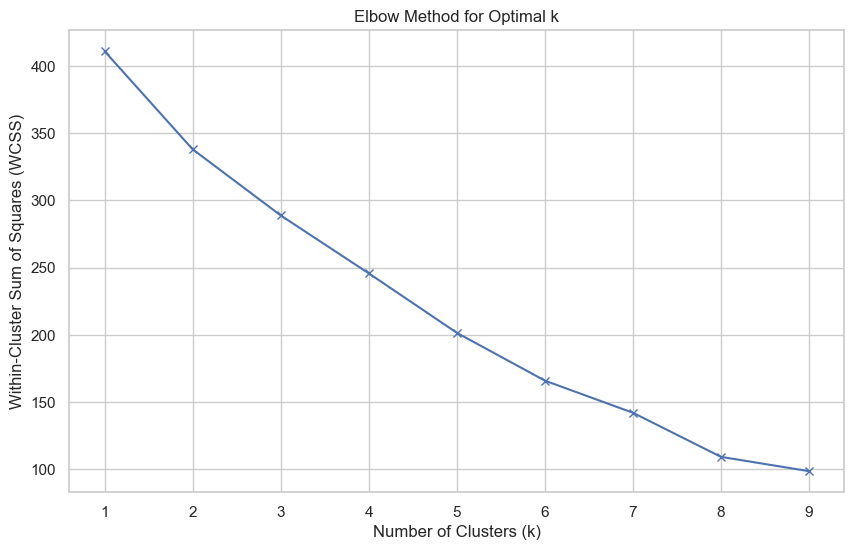

In [15]:
# Now, you can proceed with KMeans clustering using the filled data
WCSS = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(data_scaled_filled)
    WCSS[k] = kmeans.inertia_
    
# Generate the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

- WCSS: This is a dictionary to store the Within-Cluster Sum of Squares for different values of k.

- The code then iterates over a range of values for k (number of clusters) from 1 to 9.

- For each value of k, it creates a KMeans model, fits it to the filled and scaled data (data_scaled_filled), and calculates the WCSS.

- The WCSS is the sum of the squared distances between each data point and its assigned cluster center. It is a measure of how compact the clusters are.

- The Elbow plot is generated using Matplotlib, showing the WCSS for different values of k.

The "elbow" in the plot represents a point where increasing the number of clusters doesn't significantly decrease the WCSS. The optimal number of clusters is often chosen at this "elbow" point.

# Checking the Silhouette Score

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

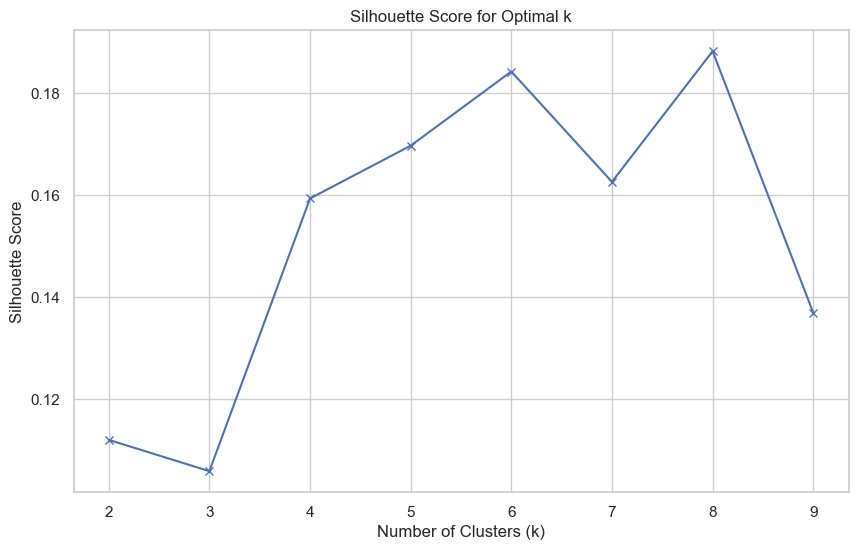

In [16]:
# Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(data_scaled_filled)
    labels = kmeans.labels_
    sc[k] = silhouette_score(data_scaled_filled, labels)

# Generate the Silhouette Score plot
plt.figure(figsize=(10, 6))
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

- sc: This is an empty dictionary used to store the Silhouette score for each value of k.

- The code iterates over a range of values for k (number of clusters) from 2 to 9.

- For each value of k, it creates a KMeans model, fits it to the filled and scaled data (data_scaled_filled), and calculates the Silhouette Score.

- The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The Silhouette Score plot is generated using Matplotlib, showing the scores for different values of k. The optimal number of clusters is often associated with the highest Silhouette Score.

In [17]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10)

# Fit KMeans to the scaled data
kmeans.fit(data_scaled_filled)

# Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled_filled)
data['KMeans_Labels'] = kmeans.predict(data_scaled_filled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


- KMeans(n_clusters=4, random_state=1, n_init=10): This initializes a KMeans clustering model with four clusters (n_clusters=4). The random_state=1 ensures reproducibility, and n_init=10 sets the number of times the algorithm will be run with different centroid seeds.

- kmeans.fit(data_scaled_filled): This fits the KMeans model to the filled and scaled data (data_scaled_filled).

- kmeans.predict(data_scaled_filled): This predicts the cluster labels for each data point in the scaled data.

- data_scaled_copy['KMeans_Labels']: This creates a new column in the deep copy of the scaled data (data_scaled_copy) to store the predicted cluster labels.

- data['KMeans_Labels']: This creates a new column in the original data (data) to store the predicted cluster labels.

Now, both data_scaled_copy and data have a new column called 'KMeans_Labels' containing the predicted cluster labels assigned by KMeans.

# Get the counts of elements in each cluster

In [18]:
data['KMeans_Labels'].value_counts()

KMeans_Labels
0    7
1    6
3    2
2    1
Name: count, dtype: int64

The code data['KMeans_Labels'].value_counts() is used to display the count of data points in each cluster after applying KMeans clustering. The result shows the distribution of data points across the clusters.

# Cluster profiling

In [19]:
columns_to_drop = ["Year"]                                                      
data1 = data.drop(columns=columns_to_drop)
# Get numeric columns (excluding 'Product Name' and 'Brand')
numeric_columns = data1.select_dtypes(include=['number']).columns

# Calculate mean and median of the original data for each label
mean = data1.groupby('KMeans_Labels')[numeric_columns].mean()
median = data1.groupby('KMeans_Labels')[numeric_columns].median()

# Concatenate mean and median vertically
df_kmeans = pd.concat([mean, median], axis=0)

# Set meaningful index names
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean','group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

# Transpose the DataFrame for a clearer view
df_kmeans.T


,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
GDP GROWTH,7.042857,4.200000,14.0,2.8,7.8,3.75,14.0,2.8
AGRIC GROWTH,6.114286,2.300000,1.4,7.3,6.2,2.40,1.4,7.3
CROPS GROWTH,6.657143,2.750000,3.7,8.6,7.2,2.50,3.7,8.6
COCOA GROWTH,6.800000,-1.633333,14.0,1.4,5.0,-1.65,14.0,1.4
LIVESTOCK GROWTH,5.128571,5.216667,5.1,5.5,5.2,5.35,5.1,5.5
FORESTRY GROWTH,3.814286,-0.983333,-14.0,-9.4,4.4,-1.60,-14.0,-9.4
FISHING GROWTH,5.828571,-4.016667,-8.7,14.1,5.7,-2.55,-8.7,14.1
INDUSTRY GROWTH,7.157143,4.650000,32.0,-2.5,7.2,4.35,32.0,-2.5
MINING GROWTH,8.057143,6.616667,78.1,-9.2,6.8,6.15,78.1,-9.2
OIL GROWTH,26.825000,3.620000,NaN,-4.6,19.8,8.00,NaN,-4.6


The code calculates the mean and median of the original data for each cluster label obtained from KMeans clustering. It separates the numeric columns and then computes the mean and median for each cluster group, creating a DataFrame (df_kmeans) with the results.

# Agglomerative clustering and Dendogram comparing result to Kmeans

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    KMeans_Labels  Agglomerative_Labels
0               1                     0
1               0                     0
2               0                     0
3               0                     0
4               2                     2
5               0                     0
6               0                     0
7               1                     0
8               1                     0
9               1                     0
10              0                     0
11              1                     0
12              1                     0
13              3                     1
14              3                     1
15              0                     0


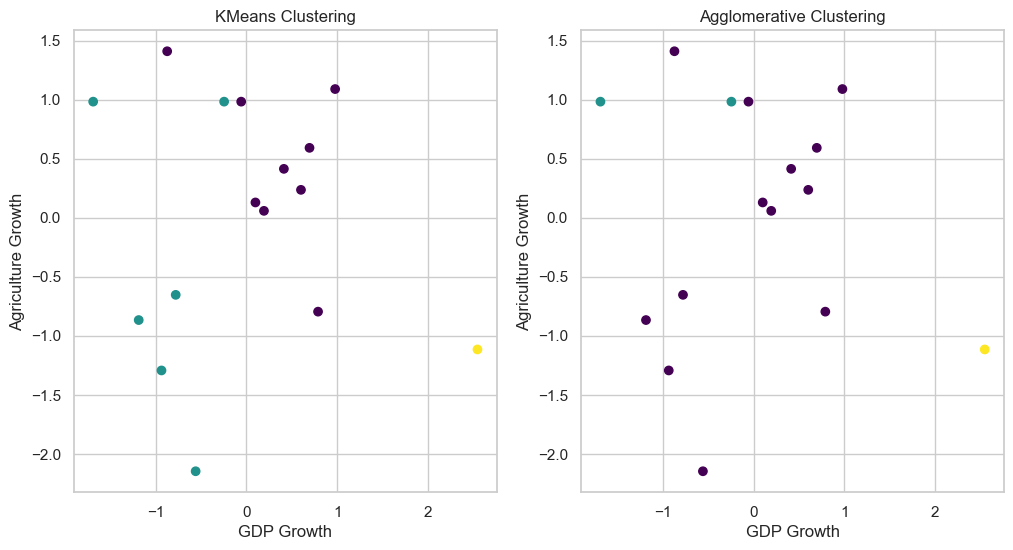

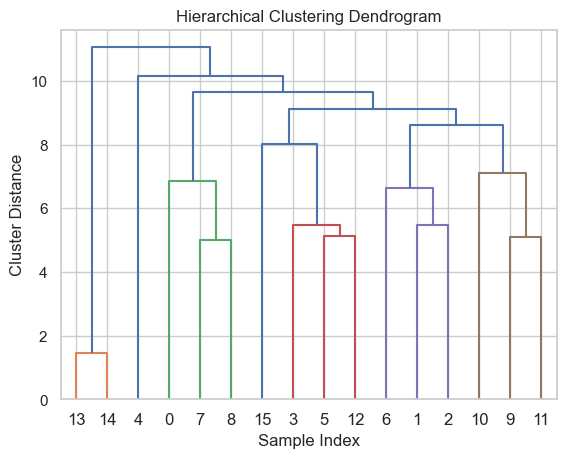

In [20]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Perform Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(data_scaled_filled)


# Add Agglomerative clustering labels to the DataFrame
data['Agglomerative_Labels'] = agg_labels

# Compare KMeans and Agglomerative clustering results
comparison_df = pd.DataFrame({
    'KMeans_Labels': data['KMeans_Labels'],
    'Agglomerative_Labels': data['Agglomerative_Labels']
})

# Display the comparison DataFrame
print(comparison_df)

# Compare Agglomerative clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled_filled)


# Visualize the comparison
plt.figure(figsize=(12, 6))

# Plot KMeans clusters
plt.subplot(1, 2, 1)
plt.scatter(data_scaled_filled['GDP GROWTH'], data_scaled_filled['AGRIC GROWTH'], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('GDP Growth')
plt.ylabel('Agriculture Growth')

# Plot Agglomerative clusters
plt.subplot(1, 2, 2)  # Change the subplot index to 2
plt.scatter(data_scaled_filled['GDP GROWTH'], data_scaled_filled['AGRIC GROWTH'], c=agg_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('GDP Growth')
plt.ylabel('Agriculture Growth')

plt.show()


# Generate dendrogram
linkage_matrix = linkage(data_scaled_filled, 'ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


The code performs Agglomerative Clustering, compares it with KMeans clustering, and generates a dendrogram for hierarchical clustering. 

# Comparing Silhouette score of both models 

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# Assuming data_scaled_filled is the filled and scaled DataFrame
# You can use the same DataFrame as used in the previous examples

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled_filled)
kmeans_silhouette = silhouette_score(data_scaled_filled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Agglomerative
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(data_scaled_filled)
agglomerative_silhouette = silhouette_score(data_scaled_filled, agglomerative_labels)
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette}")




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Silhouette Score: 0.10580940712389791
Agglomerative Silhouette Score: 0.12920918905866707


The provided code calculates the silhouette score for both KMeans and Agglomerative clustering. 

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The goal is to have a silhouette score close to 1

# Justify which clustering method provides a better understanding of the dataset.

To determine which clustering method provides a better understanding of the dataset, we can consider both the cluster assignments and the silhouette scores.

Cluster Assignments:

KMeans_Labels:
Cluster 0: 1 sample
Cluster 1: 5 samples
Cluster 2: 1 sample
Cluster 3: 9 samples
Agglomerative_Labels:
Cluster 0: 11 samples
Cluster 1: 2 samples
Cluster 2: 2 samples
Looking at the cluster assignments, Agglomerative clustering seems to create more balanced clusters, with more samples in each cluster compared to KMeans. Cluster 0 dominates in both methods.

Silhouette Scores:

KMeans Silhouette Score: 0.1058
Agglomerative Silhouette Score: 0.1292
The silhouette scores suggest that Agglomerative clustering performs slightly better than KMeans in terms of the separation and cohesion of clusters. However, both silhouette scores are relatively low, indicating that the data may not have well-defined clusters.

Conclusion:
Considering both the cluster assignments and silhouette scores, Agglomerative clustering appears to provide a better understanding of the dataset in this case. It results in more balanced clusters, and the slightly higher silhouette score indicates better-defined clusters compared to KMeans. However, it's important to note that the dataset might not have clear and distinct clusters, as suggested by the relatively low silhouette scores. It could be beneficial to explore other clustering algorithms or preprocess the data further for improved results.